In [1]:
import os 
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
import missingno as msno

In [2]:
os.chdir('C:\\Users\\rhian\\Downloads\\CYPLAN 255\\AP-Exams\\Data')
os.getcwd()

'C:\\Users\\rhian\\Downloads\\CYPLAN 255\\AP-Exams\\Data'

In [3]:
ap_cali = pd.read_csv('AP_Exams_Cali.csv')

# drop unecessary columns 
ap_cali = ap_cali.drop(['crdc_id', 'fips'], axis=1)

# drop rows with letters in id columns 
ap_cali = ap_cali[ap_cali['ncessch'] != "06CC14100001"]

# turn id columns to numeric values 
cols = ['ncessch', 'leaid']
ap_cali[cols] = ap_cali[cols].apply(pd.to_numeric, axis=1)


ap_cali

C:\Users\rhian\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ncessch,year,leaid,race,sex,students_AP_exam_none,students_AP_pass_none,students_AP_exam_oneormore,students_AP_pass_oneormore
0,4.003240e+10,2011,400324.0,1,1,NaN,NaN,NaN,NaN
1,4.003240e+10,2011,400324.0,2,1,NaN,NaN,NaN,NaN
2,4.003240e+10,2011,400324.0,3,1,NaN,NaN,NaN,NaN
3,4.003240e+10,2011,400324.0,4,1,NaN,NaN,NaN,NaN
4,4.003240e+10,2011,400324.0,5,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
960187,6.057301e+10,2017,605730.0,4,99,NaN,NaN,NaN,NaN
960188,6.057301e+10,2017,605730.0,5,99,NaN,NaN,NaN,NaN
960189,6.057301e+10,2017,605730.0,6,99,NaN,NaN,NaN,NaN
960190,6.057301e+10,2017,605730.0,7,99,NaN,NaN,NaN,NaN


In [4]:
directory = pd.read_csv('directory_all.csv')
directory = directory.drop(['school_id', 'state_leaid', 'seasch', 'street_mailing', 
                            'city_mailing', 'zip_mailing', 'state_mailing', 
                            'phone', 'fips', 'ncessch_num', 'shared_time'], axis=1)

directory[directory[['school_level', 'lowest_grade_offered', 'highest_grade_offered', 
                 'title_i_status', 'title_i_eligible', 'title_i_schoolwide', 
                 'magnet', 'teachers_fte', 'free_lunch', 'reduced_price_lunch',
                 'free_or_reduced_price_lunch', 'enrollment']] < 0] = np.nan

directory

C:\Users\rhian\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,7,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,year,ncessch,school_name,leaid,lea_name,street_location,city_location,state_location,zip_location,latitude,longitude,urban_centric_locale,county_code,school_level,school_type,school_status,lowest_grade_offered,highest_grade_offered,bureau_indian_education,title_i_status,title_i_eligible,title_i_schoolwide,charter,magnet,teachers_fte,free_lunch,reduced_price_lunch,free_or_reduced_price_lunch,elem_cedp,high_cedp,middle_cedp,ungrade_cedp,enrollment
0,2011,60000103278,VASQUEZ HIGH,600001,ACTON-AGUA DULCE UNIFIED,33630 RED ROVER MINE RD,ACTON,CA,93510,34.493620,-118.216110,42.0,6037.0,3.0,1.0,1.0,9.0,12.0,0.0,NaN,0.0,NaN,0.0,0.0,22.0,NaN,NaN,NaN,0,1,0,0,513.0
1,2011,60000106294,AGUA DULCE ELEMENTARY,600001,ACTON-AGUA DULCE UNIFIED,11311 WEST FRASCATI ST,AGUA DULCE,CA,91390,34.487703,-118.332828,41.0,6037.0,1.0,1.0,1.0,0.0,5.0,0.0,NaN,1.0,1.0,0.0,0.0,8.0,NaN,NaN,NaN,1,0,0,0,203.0
2,2011,60000107534,MEADOWLARK ELEMENTARY,600001,ACTON-AGUA DULCE UNIFIED,3015 WEST SACRAMENTO ST,ACTON,CA,93510,34.474270,-118.185604,42.0,6037.0,1.0,1.0,1.0,0.0,5.0,0.0,NaN,1.0,1.0,0.0,0.0,14.0,NaN,NaN,NaN,1,0,0,0,391.0
3,2011,60000109444,HIGH DESERT,600001,ACTON-AGUA DULCE UNIFIED,3620 ANTELOPE WOODS RD,ACTON,CA,93510,34.491331,-118.194809,41.0,6037.0,2.0,1.0,1.0,6.0,8.0,0.0,NaN,1.0,1.0,0.0,0.0,16.0,NaN,NaN,NaN,0,0,1,0,399.0
4,2011,60000210346,CALIFORNIA SCHOOL FOR THE BLIND,600002,CALIFORNIA SCHOOL FOR THE BLIND (STATE SPECIAL...,500 WALNUT AVE,FREMONT,CA,94536,37.562648,-121.963360,12.0,6001.0,4.0,2.0,1.0,0.0,12.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1,1,1,0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41711,2017,69113610298,Aromas,691136,Aromas/San Juan Unified,365 Vega St.,Aromas,CA,95004,36.890677,-121.644287,41.0,6053.0,1.0,1.0,1.0,0.0,8.0,NaN,5.0,1.0,1.0,0.0,0.0,17.0,210.0,37.0,247.0,1,0,1,0,409.0
41712,2017,69113707914,Moccasin Community Day,691137,Big Oak Flat-Groveland Unified,19177 Highway 120,Groveland,CA,95321,37.835238,-120.220711,42.0,6109.0,3.0,4.0,1.0,7.0,12.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,0,1,1,0,4.0
41713,2017,69113710339,Tioga High,691137,Big Oak Flat-Groveland Unified,19304 Ferretti Rd.,Groveland,CA,95321,37.863327,-120.227139,42.0,6109.0,3.0,1.0,1.0,9.0,12.0,NaN,1.0,1.0,0.0,0.0,0.0,3.0,26.0,4.0,30.0,0,1,0,0,45.0
41714,2017,69113710340,Don Pedro High,691137,Big Oak Flat-Groveland Unified,3090 Merced Falls Rd.,La Grange,CA,95329,37.681025,-120.323089,42.0,6109.0,3.0,1.0,1.0,9.0,12.0,NaN,1.0,1.0,0.0,0.0,0.0,5.0,21.0,1.0,22.0,0,1,0,0,41.0


In [5]:
# merge directory with main boy 
ap_cali = ap_cali.merge(directory, on = ['year', 'ncessch'], how = 'left') 
ap_cali

,ncessch,year,leaid_x,race,sex,students_AP_exam_none,students_AP_pass_none,students_AP_exam_oneormore,students_AP_pass_oneormore,school_name,leaid_y,lea_name,street_location,city_location,state_location,zip_location,latitude,longitude,urban_centric_locale,county_code,school_level,school_type,school_status,lowest_grade_offered,highest_grade_offered,bureau_indian_education,title_i_status,title_i_eligible,title_i_schoolwide,charter,magnet,teachers_fte,free_lunch,reduced_price_lunch,free_or_reduced_price_lunch,elem_cedp,high_cedp,middle_cedp,ungrade_cedp,enrollment
0,4.003240e+10,2011,400324.0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.003240e+10,2011,400324.0,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.003240e+10,2011,400324.0,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.003240e+10,2011,400324.0,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.003240e+10,2011,400324.0,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960163,6.057301e+10,2017,605730.0,4,99,NaN,NaN,NaN,NaN,Uplift California South Charter,605730.0,Bradley Union Elementary,65600 Dixie St.,Bradley,CA,93426.0,35.86298,-120.805621,42.0,6053.0,3.0,1.0,3.0,9.0,12.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,22.0,4.0,26.0,0.0,1.0,0.0,0.0,46.0
960164,6.057301e+10,2017,605730.0,5,99,NaN,NaN,NaN,NaN,Uplift California South Charter,605730.0,Bradley Union Elementary,65600 Dixie St.,Bradley,CA,93426.0,35.86298,-120.805621,42.0,6053.0,3.0,1.0,3.0,9.0,12.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,22.0,4.0,26.0,0.0,1.0,0.0,0.0,46.0
960165,6.057301e+10,2017,605730.0,6,99,NaN,NaN,NaN,NaN,Uplift California South Charter,605730.0,Bradley Union Elementary,65600 Dixie St.,Bradley,CA,93426.0,35.86298,-120.805621,42.0,6053.0,3.0,1.0,3.0,9.0,12.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,22.0,4.0,26.0,0.0,1.0,0.0,0.0,46.0
960166,6.057301e+10,2017,605730.0,7,99,NaN,NaN,NaN,NaN,Uplift California South Charter,605730.0,Bradley Union Elementary,65600 Dixie St.,Bradley,CA,93426.0,35.86298,-120.805621,42.0,6053.0,3.0,1.0,3.0,9.0,12.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,22.0,4.0,26.0,0.0,1.0,0.0,0.0,46.0


In [6]:
apibgt_2011 = pd.read_csv('APIBGT_2011.csv')
apibgt_2013 = pd.read_csv('APIBGT_2013.csv')
apibgt_2015 = pd.read_csv('APIBGT_2015.csv')
apibgt_2017 = pd.read_csv('APIBGT_2017.csv')

apibgt = pd.concat([apibgt_2011, apibgt_2013, 
                    apibgt_2015, apibgt_2017]).reset_index(drop=True) 

# drop rows with letters in id columns 
apibgt = apibgt[apibgt['ncessch'] != "06CC14100001"]

# turn id columns to numeric values 
cols = ['ncessch', 'leaid']
apibgt[cols] = apibgt[cols].apply(pd.to_numeric, axis=1)

apibgt = apibgt.drop(['Unnamed: 0', 'crdc_id', 'fips', 'leaid'], axis=1)

apibgt

C:\Users\rhian\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\rhian\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,year,ncessch,race,sex,enrl_IB,enrl_AP,enrl_AP_science,enrl_AP_math,enrl_AP_other,enrl_AP_language,enrl_gifted_talented
0,2011,4.003240e+10,1,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2011,4.003240e+10,2,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2011,4.003240e+10,3,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2011,4.003240e+10,4,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2011,4.003240e+10,5,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
960187,2017,6.057301e+10,4,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
960188,2017,6.057301e+10,5,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
960189,2017,6.057301e+10,6,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
960190,2017,6.057301e+10,7,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# merge directory with main boy 
ap_cali = ap_cali.merge(apibgt, on = ['year', 'ncessch', 'race', 'sex'], how = 'left') 
ap_cali

,ncessch,year,leaid_x,race,sex,students_AP_exam_none,students_AP_pass_none,students_AP_exam_oneormore,students_AP_pass_oneormore,school_name,leaid_y,lea_name,street_location,city_location,state_location,zip_location,latitude,longitude,urban_centric_locale,county_code,school_level,school_type,school_status,lowest_grade_offered,highest_grade_offered,bureau_indian_education,title_i_status,title_i_eligible,title_i_schoolwide,charter,magnet,teachers_fte,free_lunch,reduced_price_lunch,free_or_reduced_price_lunch,elem_cedp,high_cedp,middle_cedp,ungrade_cedp,enrollment,enrl_IB,enrl_AP,enrl_AP_science,enrl_AP_math,enrl_AP_other,enrl_AP_language,enrl_gifted_talented
0,4.003240e+10,2011,400324.0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,4.003240e+10,2011,400324.0,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,4.003240e+10,2011,400324.0,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4.003240e+10,2011,400324.0,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4.003240e+10,2011,400324.0,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12069523,6.057301e+10,2017,605730.0,4,99,NaN,NaN,NaN,NaN,Uplift California South Charter,605730.0,Bradley Union Elementary,65600 Dixie St.,Bradley,CA,93426.0,35.86298,-120.805621,42.0,6053.0,3.0,1.0,3.0,9.0,12.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,22.0,4.0,26.0,0.0,1.0,0.0,0.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12069524,6.057301e+10,2017,605730.0,5,99,NaN,NaN,NaN,NaN,Uplift California South Charter,605730.0,Bradley Union Elementary,65600 Dixie St.,Bradley,CA,93426.0,35.86298,-120.805621,42.0,6053.0,3.0,1.0,3.0,9.0,12.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,22.0,4.0,26.0,0.0,1.0,0.0,0.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12069525,6.057301e+10,2017,605730.0,6,99,NaN,NaN,NaN,NaN,Uplift California South Charter,605730.0,Bradley Union Elementary,65600 Dixie St.,Bradley,CA,93426.0,35.86298,-120.805621,42.0,6053.0,3.0,1.0,3.0,9.0,12.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,22.0,4.0,26.0,0.0,1.0,0.0,0.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12069526,6.057301e+10,2017,605730.0,7,99,NaN,NaN,NaN,NaN,Uplift California South Charter,605730.0,Bradley Union Elementary,65600 Dixie St.,Bradley,CA,93426.0,35.86298,-120.805621,42.0,6053.0,3.0,1.0,3.0,9.0,12.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,22.0,4.0,26.0,0.0,1.0,0.0,0.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
absent_2013 = pd.read_csv('chronic_absent_2013.csv')
absent_2015 = pd.read_csv('chronic_absent_2015.csv')

absent = pd.concat([absent_2013, absent_2015]).reset_index(drop=True)

absent = absent[(absent['race'] == 99) & (absent['sex'] == 99)]

absent = absent.drop(['crdc_id', 'fips', 'leaid', 'race', 'sex'], axis=1)

absent

,ncessch,year,students_chronically_absent
17,60000103278,2013,42.0
41,60000106294,2013,25.0
65,60000107534,2013,68.0
89,60000109444,2013,58.0
113,60000210346,2013,45.0
...,...,...,...
462449,69113610298,2015,28.0
462473,69113707914,2015,7.0
462497,69113710339,2015,11.0
462521,69113710340,2015,17.0


In [51]:
# merge directory with main boy 
ap_cali = ap_cali.merge(absent, on = ['year', 'ncessch'], how = 'left') 
ap_cali

,ncessch,year,leaid_x,race,sex,students_AP_exam_none,students_AP_pass_none,students_AP_exam_oneormore,students_AP_pass_oneormore,school_name,leaid_y,lea_name,street_location,city_location,state_location,zip_location,latitude,longitude,urban_centric_locale,county_code,school_level,school_type,school_status,lowest_grade_offered,highest_grade_offered,bureau_indian_education,title_i_status,title_i_eligible,title_i_schoolwide,charter,magnet,teachers_fte,free_lunch,reduced_price_lunch,free_or_reduced_price_lunch,elem_cedp,high_cedp,middle_cedp,ungrade_cedp,enrollment,enrl_IB,enrl_AP,enrl_AP_science,enrl_AP_math,enrl_AP_other,enrl_AP_language,enrl_gifted_talented,students_chronically_absent
0,4.003240e+10,2011,400324.0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.003240e+10,2011,400324.0,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.003240e+10,2011,400324.0,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.003240e+10,2011,400324.0,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.003240e+10,2011,400324.0,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12071635,6.057301e+10,2017,605730.0,4,99,NaN,NaN,NaN,NaN,Uplift California South Charter,605730.0,Bradley Union Elementary,65600 Dixie St.,Bradley,CA,93426.0,35.86298,-120.805621,42.0,6053.0,3.0,1.0,3.0,9.0,12.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,22.0,4.0,26.0,0.0,1.0,0.0,0.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12071636,6.057301e+10,2017,605730.0,5,99,NaN,NaN,NaN,NaN,Uplift California South Charter,605730.0,Bradley Union Elementary,65600 Dixie St.,Bradley,CA,93426.0,35.86298,-120.805621,42.0,6053.0,3.0,1.0,3.0,9.0,12.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,22.0,4.0,26.0,0.0,1.0,0.0,0.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12071637,6.057301e+10,2017,605730.0,6,99,NaN,NaN,NaN,NaN,Uplift California South Charter,605730.0,Bradley Union Elementary,65600 Dixie St.,Bradley,CA,93426.0,35.86298,-120.805621,42.0,6053.0,3.0,1.0,3.0,9.0,12.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,22.0,4.0,26.0,0.0,1.0,0.0,0.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12071638,6.057301e+10,2017,605730.0,7,99,NaN,NaN,NaN,NaN,Uplift California South Charter,605730.0,Bradley Union Elementary,65600 Dixie St.,Bradley,CA,93426.0,35.86298,-120.805621,42.0,6053.0,3.0,1.0,3.0,9.0,12.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,22.0,4.0,26.0,0.0,1.0,0.0,0.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
discipline_2011 = pd.read_csv('discipline_2011.csv')
discipline_2013 = pd.read_csv('discipline_2013.csv')
discipline_2015 = pd.read_csv('discipline_2015.csv')
discipline_2017 = pd.read_csv('discipline_2017.csv')

discipline = pd.concat([discipline_2011, discipline_2013, 
                    discipline_2015, discipline_2017]).reset_index(drop=True)

discipline
# absent = absent[(absent['race'] == 99) & (absent['sex'] == 99)]

# absent = absent.drop(['crdc_id', 'fips', 'leaid', 'race', 'sex'], axis=1)

# absent
# # drop rows with letters in id columns 
# apibgt = apibgt[apibgt['ncessch'] != "06CC14100001"]

# # turn id columns to numeric values 
# cols = ['ncessch', 'leaid']
# apibgt[cols] = apibgt[cols].apply(pd.to_numeric, axis=1)

# apibgt

C:\Users\rhian\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\rhian\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


MemoryError: Unable to allocate 5.80 MiB for an array with shape (760350,) and data type int64

In [ ]:
ap_totals = ap_cali[(ap_cali['race'] == 99) & (ap_cali['sex'] == 99)]
ap_totals.dropna(subset = ['students_AP_exam_oneormore'])

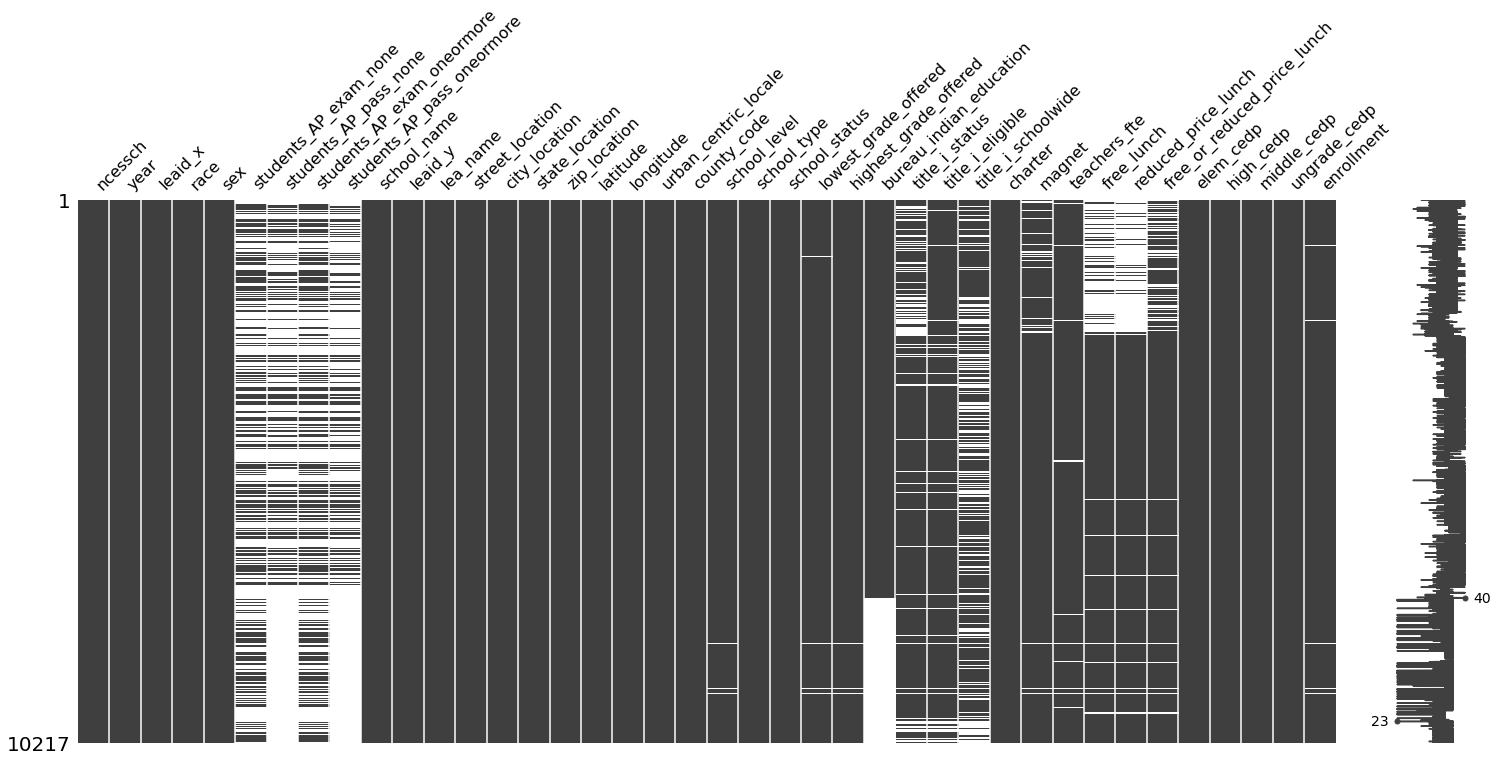

In [20]:
msno.matrix(ap_hs);

,ncessch,year,leaid_x,race,sex,students_AP_exam_none,students_AP_pass_none,students_AP_exam_oneormore,students_AP_pass_oneormore,school_name,leaid_y,lea_name,street_location,city_location,state_location,zip_location,latitude,longitude,urban_centric_locale,county_code,school_level,school_type,school_status,lowest_grade_offered,highest_grade_offered,bureau_indian_education,title_i_status,title_i_eligible,title_i_schoolwide,charter,magnet,teachers_fte,free_lunch,reduced_price_lunch,free_or_reduced_price_lunch,elem_cedp,high_cedp,middle_cedp,ungrade_cedp,enrollment
157879,6.000010e+10,2011,600001.0,99,99,89.0,8.0,42.0,26.0,VASQUEZ HIGH,600001.0,ACTON-AGUA DULCE UNIFIED,33630 RED ROVER MINE RD,ACTON,CA,93510.0,34.493620,-118.216110,42.0,6037.0,3.0,1.0,1.0,9.0,12.0,0.0,NaN,0.0,NaN,0.0,0.0,22.0,NaN,NaN,NaN,0.0,1.0,0.0,0.0,513.0
157919,6.000031e+10,2011,600003.0,99,99,13.0,NaN,2.0,NaN,CALIFORNIA SCHOOL FOR THE DEAF-FREMONT,600003.0,CALIFORNIA SCHOOL FOR THE DEAF-FREMONT (STATE ...,39350 GALLAUDET DR,FREMONT,CA,94538.0,37.559633,-121.963038,12.0,6001.0,4.0,2.0,1.0,NaN,12.0,0.0,NaN,0.0,NaN,0.0,NaN,82.0,336.0,0.0,336.0,1.0,1.0,1.0,0.0,420.0
157983,6.000111e+10,2011,600011.0,99,99,2.0,NaN,4.0,NaN,HERLONG HIGH,600011.0,FORT SAGE UNIFIED,200 DS HALL,HERLONG,CA,96113.0,40.138741,-120.143969,43.0,6035.0,3.0,1.0,1.0,9.0,12.0,0.0,2.0,1.0,0.0,0.0,0.0,7.0,NaN,NaN,NaN,0.0,1.0,0.0,0.0,78.0
158039,6.000130e+10,2011,600013.0,99,99,11.0,108.0,483.0,357.0,ROCKLIN HIGH,600013.0,ROCKLIN UNIFIED,5301 VICTORY LN,ROCKLIN,CA,95765.0,38.813629,-121.253474,21.0,6061.0,3.0,1.0,1.0,9.0,12.0,0.0,NaN,0.0,NaN,0.0,0.0,75.0,NaN,NaN,NaN,0.0,1.0,0.0,0.0,1843.0
158151,6.000131e+10,2011,600013.0,99,99,0.0,78.0,424.0,208.0,WHITNEY HIGH,600013.0,ROCKLIN UNIFIED,701 WILDCAT BLVD,ROCKLIN,CA,95765.0,38.836409,-121.289393,41.0,6061.0,3.0,1.0,1.0,9.0,12.0,0.0,NaN,0.0,NaN,0.0,0.0,69.0,NaN,NaN,511.0,0.0,1.0,0.0,0.0,1777.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959935,NaN,2017,NaN,99,99,2.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959943,NaN,2017,NaN,99,99,3.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959951,NaN,2017,NaN,99,99,4.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
960095,6.910351e+10,2017,691035.0,99,99,29.0,NaN,227.0,NaN,University Preparatory Academy Charter,691035.0,Santa Clara County Office of Education,2315 Canoas Garden Ave.,San Jose,CA,95125.0,37.291038,-121.873940,11.0,6085.0,3.0,1.0,1.0,7.0,12.0,NaN,NaN,NaN,NaN,1.0,0.0,32.0,90.0,75.0,165.0,0.0,1.0,1.0,0.0,656.0


In [22]:
ap_hs.dropna(subset = ['students_AP_exam_oneormore'])

,ncessch,year,leaid_x,race,sex,students_AP_exam_none,students_AP_pass_none,students_AP_exam_oneormore,students_AP_pass_oneormore,school_name,leaid_y,lea_name,street_location,city_location,state_location,zip_location,latitude,longitude,urban_centric_locale,county_code,school_level,school_type,school_status,lowest_grade_offered,highest_grade_offered,bureau_indian_education,title_i_status,title_i_eligible,title_i_schoolwide,charter,magnet,teachers_fte,free_lunch,reduced_price_lunch,free_or_reduced_price_lunch,elem_cedp,high_cedp,middle_cedp,ungrade_cedp,enrollment
157879,6.000010e+10,2011,600001.0,99,99,89.0,8.0,42.0,26.0,VASQUEZ HIGH,600001.0,ACTON-AGUA DULCE UNIFIED,33630 RED ROVER MINE RD,ACTON,CA,93510.0,34.493620,-118.216110,42.0,6037.0,3.0,1.0,1.0,9.0,12.0,0.0,NaN,0.0,NaN,0.0,0.0,22.0,NaN,NaN,NaN,0.0,1.0,0.0,0.0,513.0
157919,6.000031e+10,2011,600003.0,99,99,13.0,NaN,2.0,NaN,CALIFORNIA SCHOOL FOR THE DEAF-FREMONT,600003.0,CALIFORNIA SCHOOL FOR THE DEAF-FREMONT (STATE ...,39350 GALLAUDET DR,FREMONT,CA,94538.0,37.559633,-121.963038,12.0,6001.0,4.0,2.0,1.0,NaN,12.0,0.0,NaN,0.0,NaN,0.0,NaN,82.0,336.0,0.0,336.0,1.0,1.0,1.0,0.0,420.0
157983,6.000111e+10,2011,600011.0,99,99,2.0,NaN,4.0,NaN,HERLONG HIGH,600011.0,FORT SAGE UNIFIED,200 DS HALL,HERLONG,CA,96113.0,40.138741,-120.143969,43.0,6035.0,3.0,1.0,1.0,9.0,12.0,0.0,2.0,1.0,0.0,0.0,0.0,7.0,NaN,NaN,NaN,0.0,1.0,0.0,0.0,78.0
158039,6.000130e+10,2011,600013.0,99,99,11.0,108.0,483.0,357.0,ROCKLIN HIGH,600013.0,ROCKLIN UNIFIED,5301 VICTORY LN,ROCKLIN,CA,95765.0,38.813629,-121.253474,21.0,6061.0,3.0,1.0,1.0,9.0,12.0,0.0,NaN,0.0,NaN,0.0,0.0,75.0,NaN,NaN,NaN,0.0,1.0,0.0,0.0,1843.0
158151,6.000131e+10,2011,600013.0,99,99,0.0,78.0,424.0,208.0,WHITNEY HIGH,600013.0,ROCKLIN UNIFIED,701 WILDCAT BLVD,ROCKLIN,CA,95765.0,38.836409,-121.289393,41.0,6061.0,3.0,1.0,1.0,9.0,12.0,0.0,NaN,0.0,NaN,0.0,0.0,69.0,NaN,NaN,511.0,0.0,1.0,0.0,0.0,1777.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959815,6.910050e+10,2017,691005.0,99,99,1.0,NaN,556.0,NaN,Clayton Valley Charter High,691005.0,Contra Costa County Office of Education,1101 Alberta Way,Concord,CA,94521.0,37.949703,-121.969046,21.0,6013.0,3.0,1.0,1.0,9.0,12.0,NaN,NaN,NaN,NaN,1.0,0.0,77.0,384.0,99.0,483.0,0.0,1.0,0.0,0.0,2187.0
959823,6.910051e+10,2017,691005.0,99,99,1.0,NaN,102.0,NaN,Making Waves Academy,691005.0,Contra Costa County Office of Education,4123 Lakeside Dr.,Richmond,CA,94806.0,37.988705,-122.332714,21.0,6013.0,3.0,1.0,1.0,5.0,12.0,NaN,5.0,1.0,1.0,1.0,0.0,46.0,560.0,123.0,683.0,0.0,1.0,1.0,0.0,795.0
959879,6.910241e+10,2017,691024.0,99,99,35.0,NaN,130.0,NaN,Samueli Academy,691024.0,Orange County Department of Education,1901 N. Fairview St.,Santa Ana,CA,92706.0,33.762300,-117.902351,11.0,6059.0,3.0,1.0,1.0,9.0,12.0,NaN,2.0,1.0,NaN,1.0,0.0,23.0,287.0,47.0,334.0,0.0,1.0,0.0,0.0,527.0
960095,6.910351e+10,2017,691035.0,99,99,29.0,NaN,227.0,NaN,University Preparatory Academy Charter,691035.0,Santa Clara County Office of Education,2315 Canoas Garden Ave.,San Jose,CA,95125.0,37.291038,-121.873940,11.0,6085.0,3.0,1.0,1.0,7.0,12.0,NaN,NaN,NaN,NaN,1.0,0.0,32.0,90.0,75.0,165.0,0.0,1.0,1.0,0.0,656.0


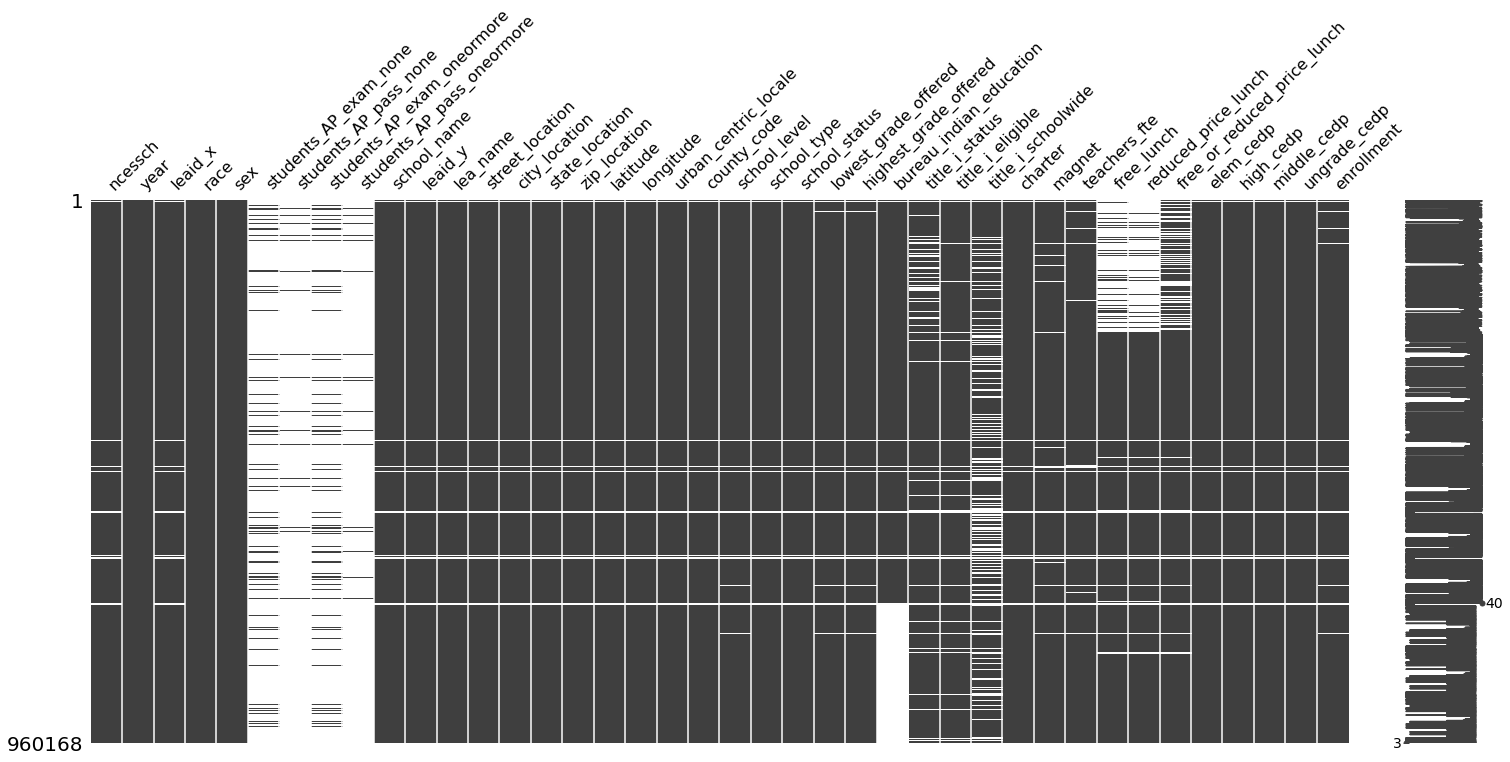

In [16]:
msno.matrix(ap_cali);

In [13]:
apibgt.dtypes

year                      int64
ncessch                  object
leaid                    object
race                      int64
sex                       int64
enrl_IB                 float64
enrl_AP                 float64
enrl_AP_science         float64
enrl_AP_math            float64
enrl_AP_other           float64
enrl_AP_language        float64
enrl_gifted_talented    float64
dtype: object

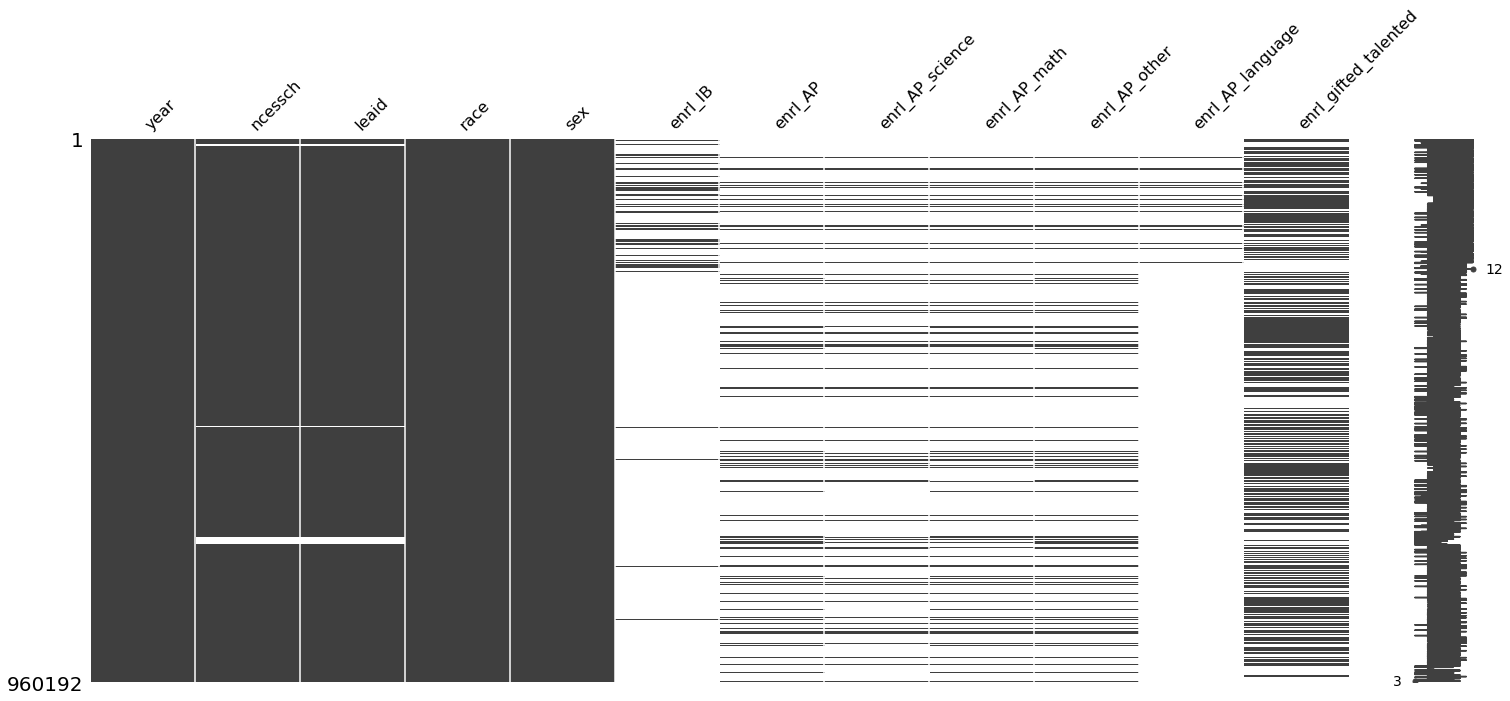

In [14]:
msno.matrix(apibgt);